## Exploratory Data Analysis

In [1]:
# importing the usual suspects

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading in the data

df=pd.read_csv('hearing_test.csv')

In [3]:
# checking out the first 5 rows

df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


We have a total of 5000 observations and have no missing values.

All 3 columns are numeric.

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5000.0,51.60900,11.287001,18.0,43.0,51.0,60.0,90.0
physical_score,5000.0,32.76026,8.169802,-0.0,26.7,35.3,38.9,50.0
test_result,5000.0,0.60000,0.489947,0.0,0.0,1.0,1.0,1.0


The youngest person in our dataset is 18 and the oldest is 90 years old.

Physical scores range from 0 to 50.

In [6]:
# checking the unique labels

df['test_result'].unique()

array([1, 0], dtype=int64)

We are working with a binary label i.e 0 and 1.

0 represents those who did not pass the test, 1 represents those who did.

In [7]:
# checking the number of instances of each label

df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

Our labels are fairly balanced. 

Let's visualize that below.

<AxesSubplot:xlabel='test_result', ylabel='count'>

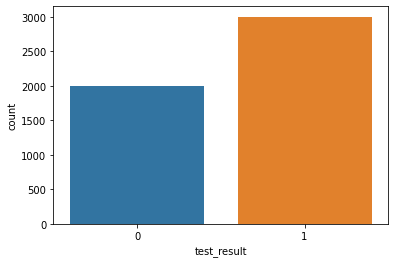

In [8]:
sns.countplot(x='test_result', data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

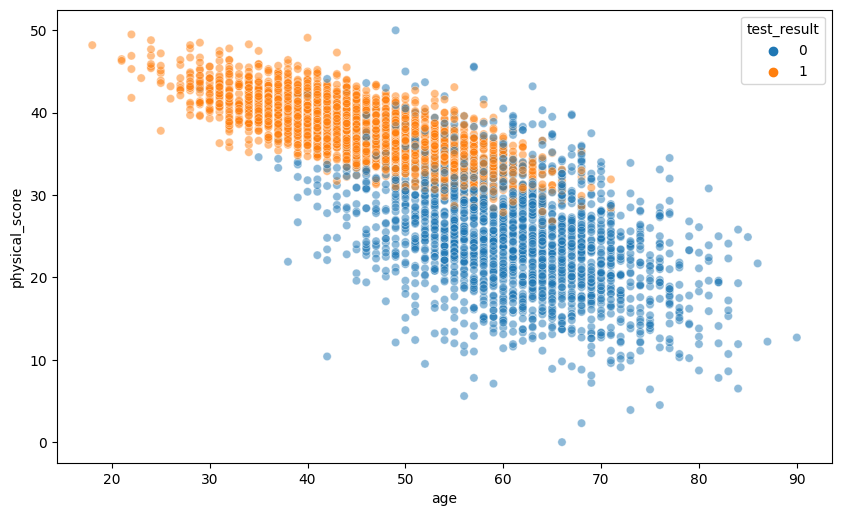

In [9]:
# a scatterplot of our features distinguished by the label(test_result)

plt.figure(figsize=(10,6), dpi=100)
sns.scatterplot(x='age',y='physical_score',hue='test_result', data=df, alpha=0.5)

We can see two clear groupings although we have some points stacked up against each other.

Physical score decreases with age.

In general, younger people with a higher physical score tended to pass the hearing test. 

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

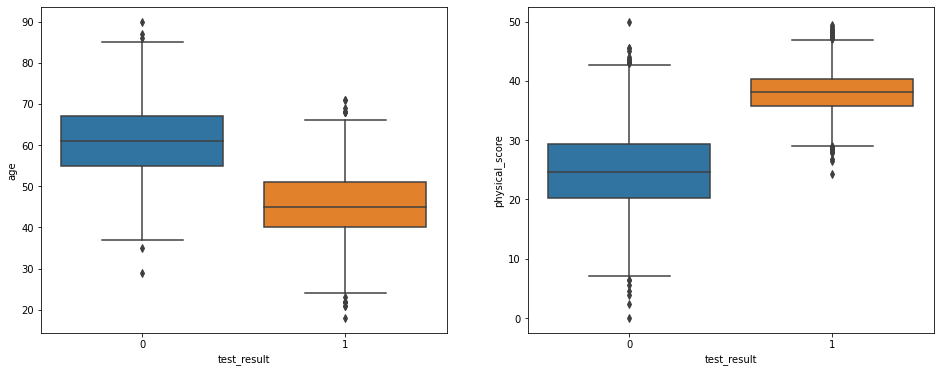

In [10]:
# boxplots to show the distributions

fig, axes = plt.subplots(1,2, figsize=(16,6))
sns.boxplot(x='test_result', y='age', data=df, ax=axes[0])
sns.boxplot(x='test_result', y='physical_score', data=df, ax=axes[1])

Those who did not pass the test tended to be older.

The distribution of physical scores for those who did not pass the test is wider compared to the physical scores of those who passed.

People with a higher physical score tended to pass the hearing test.

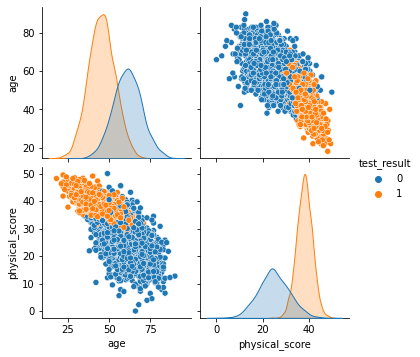

In [11]:
sns.pairplot(data=df, hue='test_result')

From the pairplot it is clear that physical score is a big indicator.

In [12]:
# how correlated are the features with the target?

df.corr()['test_result'][:-1]

age              -0.683171
physical_score    0.792716
Name: test_result, dtype: float64

Age has a fairly high negative correlation with test results indicating that the likelihood of passing the test decreases with an increase in age.

The chances of not passing the test decrease with an increase in physical score.

<AxesSubplot:>

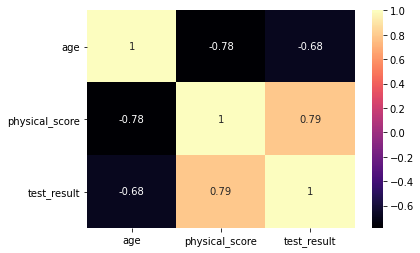

In [13]:
# how correlated are the features?

sns.heatmap(df.corr(), annot=True, cmap='magma')

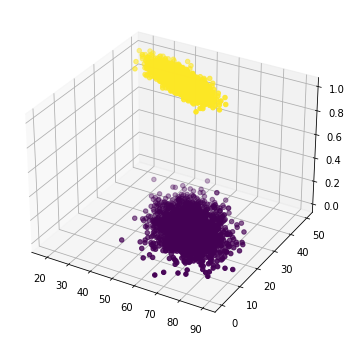

In [14]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

There is clear separation between people who passed the hearing test and people who did not.

The model we build should therefore be able to score highly on this particular classification task.

## Machine Learning

In [15]:
# separating the features from the class label

X=df.drop('test_result', axis=1)
y=df['test_result']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### feature scaling

In [18]:
# importing StandardScaler

from sklearn.preprocessing import StandardScaler

In [19]:
# an instance of StandardScaler

scaler=StandardScaler()

In [20]:
# actually scaling our features

scaled_X_train=scaler.fit_transform(X_train)

scaled_X_test=scaler.transform(X_test)

We only fit to the training data and never to the test data. This is to avoid data leakage. The test data is just transformed.

### the model

In [21]:
# importing logistic regression

from sklearn.linear_model import LogisticRegression

In [22]:
# creating an instance of logistic regression

log_model=LogisticRegression()

In [23]:
# fitting the training data

log_model.fit(scaled_X_train,y_train)

LogisticRegression()

### evaluation & interpretation

In [24]:
# checking out the model coefficients

log_model.coef_

array([[-0.94953524,  3.45991194]])

A negative age coefficient means the odds of passing the test decrease per unit increase in age.

The odds of passing the test increase per unit increase in physical score.

Compared to age, physical score is a stronger predictor.

In [25]:
log_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [26]:
y_pred=log_model.predict(scaled_X_test)

In [27]:
from sklearn.metrics import plot_confusion_matrix, classification_report

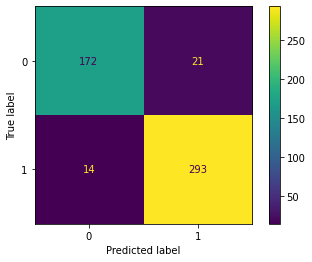

In [28]:
plot_confusion_matrix(log_model, scaled_X_test, y_test)

Our model does well. It misclassifies 35 out of 500 points.

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



The scores are good for every class with an overall accuracy of 93%.